In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
from sqlalchemy import inspect
for table_name in inspect(engine).get_table_names():
    print(table_name)

measurement
station


In [11]:
inspector=inspect(engine)
for col in inspector.get_columns('measurement'):
    print (col['name'], col['type'])
print ("---------")
for col in inspector.get_columns('station'):
    print (col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
---------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
latest_date, = session.query(Measurement.date).order_by(Measurement.date.desc()).first() 
print("Latest Date in database:  " + latest_date)
last_year = str(int(latest_date[0:4])-1)
latest_minus_year = last_year + latest_date[4:11]
print("One Year Prior To Latest: " + latest_minus_year)

Latest Date in database:  2017-08-23
One Year Prior To Latest: 2016-08-23


In [13]:
# a little extraneous code to be used in the flask program -
# testing to validate results
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date>=latest_minus_year)

precip_dict = []
for i in precip_data:
    precip_dict.append({"date":i[0], "amount":i[1]})
    
precip_dict


[{'date': '2016-08-23', 'amount': 0.0},
 {'date': '2016-08-24', 'amount': 0.08},
 {'date': '2016-08-25', 'amount': 0.08},
 {'date': '2016-08-26', 'amount': 0.0},
 {'date': '2016-08-27', 'amount': 0.0},
 {'date': '2016-08-28', 'amount': 0.01},
 {'date': '2016-08-29', 'amount': 0.0},
 {'date': '2016-08-30', 'amount': 0.0},
 {'date': '2016-08-31', 'amount': 0.13},
 {'date': '2016-09-01', 'amount': 0.0},
 {'date': '2016-09-02', 'amount': 0.0},
 {'date': '2016-09-03', 'amount': 0.0},
 {'date': '2016-09-04', 'amount': 0.03},
 {'date': '2016-09-05', 'amount': None},
 {'date': '2016-09-06', 'amount': None},
 {'date': '2016-09-07', 'amount': 0.05},
 {'date': '2016-09-08', 'amount': 0.0},
 {'date': '2016-09-09', 'amount': 0.03},
 {'date': '2016-09-10', 'amount': 0.0},
 {'date': '2016-09-11', 'amount': 0.05},
 {'date': '2016-09-12', 'amount': 0.0},
 {'date': '2016-09-13', 'amount': 0.02},
 {'date': '2016-09-14', 'amount': 1.32},
 {'date': '2016-09-15', 'amount': 0.42},
 {'date': '2016-09-16', 'am

In [14]:
# Perform a query to retrieve the data and precipitation scores
data = list(session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date>=latest_minus_year))

[*data]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
#  save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(data, columns=['date','precipitation'])
data_df.set_index("date",inplace=True)
data_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [16]:
# Sort the dataframe by date
sorted_df = data_df.sort_values("date")
sorted_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


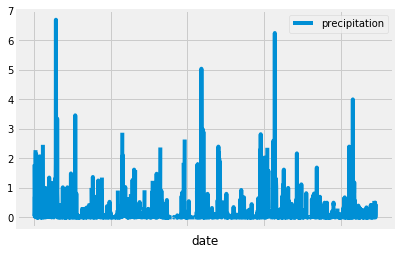

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

sorted_df.plot()
plt.show()



![precipitation](Images/precipitation.png)

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.id).count()
print("There are " + str(station_count) + " stations monitoring the Hawaiian weather")

There are 9 stations monitoring the Hawaiian weather


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
data = session.query(Measurement.station, func.count(Measurement.station).label('total')).\
    group_by(Measurement.station).\
    order_by('total DESC').\
    all()
[*data]

C:\Users\Laptop 1\Anaconda3\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'total DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
lowtemp, = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()
hightemp, = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()
avgtemp, = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()

avgtemp_formatted = "{0:.2f}".format(avgtemp)

print("At station USC00519281:")
print("   The lowest observed temperature was  " + str(lowtemp))
print("   The highest observed temperature was " + str(hightemp))
print("     And the average of all temperature observations was " + str(avgtemp_formatted))


At station USC00519281:
   The lowest observed temperature was  54.0
   The highest observed temperature was 85.0
     And the average of all temperature observations was 71.66


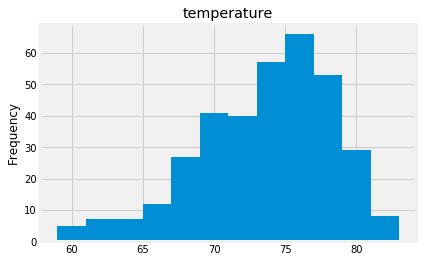

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(Measurement.station, func.count(Measurement.tobs).label('total')).\
    group_by(Measurement.station).\
    order_by('total DESC').\
    all()

# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date>=latest_minus_year).\
    all()

data_df = pd.DataFrame(data, columns=['date','temperature'])
data_df.set_index("date",inplace=True)
data_df.head()

hist = data_df.hist(bins=12)
hist0 = hist[0]
for x in hist0:
    x.set_ylabel("Frequency")
    
    

##  Note: the "flask" api program logic is contained in a separate module called app.py.
Per Cam on 4/13, flask programs should not be placed in a jupyter notebook.

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
#    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
          filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
firstday = '2012-08-26'
lastday =  '2012-09-04'
# as it happens, we were actually in Hawaii during this date range
td_list = calc_temps(firstday, lastday)
tmin = td_list[0][0]
tavg = td_list[0][1]
tmax = td_list[0][2]


tavg_formatted = "{0:.2f}".format(tavg)

print("For the time period during my dates " + firstday + ' to ' + lastday + ":")
print("   The lowest observed temperature was  " + str(tmin))
print("   The highest observed temperature was " + str(tmax))
print("     And the average of all temperature observations was " + str(tavg_formatted))



For the time period during my dates 2012-08-26 to 2012-09-04:
   The lowest observed temperature was  67.0
   The highest observed temperature was 82.0
     And the average of all temperature observations was 75.16


<BarContainer object of 1 artists>

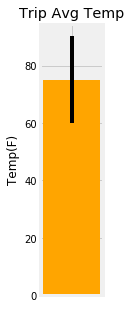

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize=(1,5))
plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
tyerr=tmax-tmin
plt.bar(1, tavg, color="orange", width = .1, align="center", yerr=tyerr, tick_label=" ")

In [81]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

precip_data2_list=[]

precip_data2 = session.query(Measurement, Station).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date>=firstday).\
    filter(Measurement.date<=lastday).\
    order_by(Measurement.prcp.desc()).all()

for record in precip_data2:
    (meas, stat) = record
    precip_data2_list.append({"date": meas.date, "prcp": meas.prcp, "station": stat.station, "name": stat.name,
                             "latitude": stat.latitude, "longitude": stat.longitude, "elevation": stat.elevation})

    
precip_data2_df = pd.DataFrame(precip_data2_list)
precip_data2_df = precip_data2_df.fillna(0)

pd.set_option('max_rows', 100)
display(precip_data2_df)


,date,elevation,latitude,longitude,name,prcp,station
0,2012-08-28,152.4,21.33310,-157.80250,"MANOA LYON ARBO 785.2, HI US",1.19,USC00516128
1,2012-08-28,3.0,21.27160,-157.81680,"WAIKIKI 717.2, HI US",1.00,USC00519397
2,2012-08-29,152.4,21.33310,-157.80250,"MANOA LYON ARBO 785.2, HI US",0.90,USC00516128
3,2012-08-28,32.9,21.45167,-157.84889,"WAIHEE 837.5, HI US",0.76,USC00519281
4,2012-09-02,152.4,21.33310,-157.80250,"MANOA LYON ARBO 785.2, HI US",0.46,USC00516128
5,2012-08-30,152.4,21.33310,-157.80250,"MANOA LYON ARBO 785.2, HI US",0.44,USC00516128
6,2012-09-02,32.9,21.45167,-157.84889,"WAIHEE 837.5, HI US",0.33,USC00519281
7,2012-08-30,32.9,21.45167,-157.84889,"WAIHEE 837.5, HI US",0.32,USC00519281
8,2012-08-29,32.9,21.45167,-157.84889,"WAIHEE 837.5, HI US",0.30,USC00519281
9,2012-08-31,152.4,21.33310,-157.80250,"MANOA LYON ARBO 785.2, HI US",0.26,USC00516128


## Optional Challenge Assignment

In [82]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [95]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
print(firstday, lastday)

# Use the start and end date to create a range of dates
day_list = [firstday]

thisdate = dt.date(int(firstday[0:4]), int(firstday[5:7]), int(firstday[8:10]))
lastdate = dt.date(int(lastday[0:4]), int(lastday[5:7]), int(lastday[8:10]))

while thisdate < lastdate:
    thisdate = thisdate + dt.timedelta(days=1)
    day_list.append(str(thisdate))


# Stip off the year and save a list of %m-%d strings
mm_dd_list = []
for item in day_list:
    mm_dd_list.append(item[5:10])

    
# Loop through the list of %m-%d strings and calculate the normals for each date
tmaxs = []
tmins = []
tavgs = []

for item in mm_dd_list:
    normals = daily_normals(item)
    tmins.append(normals[0][0])
    tavgs.append(normals[0][1])
    tmaxs.append(normals[0][2])
    
print(tavgs)
    


2012-08-26 2012-09-04
[76.56862745098039, 76.28301886792453, 76.73469387755102, 76.23529411764706, 76.41666666666667, 76.84, 77.0, 76.66666666666667, 76.13725490196079, 76.27083333333333]


In [97]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
results_dict = {"trip_dates": mm_dd_list,
                "minimums": tmins,
                "averages": tavgs,
                "maximums": tmaxs}
results_df = pd.DataFrame(results_dict)
results_df.set_index("trip_dates",inplace=True)

display(results_df)


,minimums,averages,maximums
trip_dates,,,
08-26,71.0,76.568627,84.0
08-27,68.0,76.283019,84.0
08-28,67.0,76.734694,86.0
08-29,70.0,76.235294,85.0
08-30,68.0,76.416667,84.0
08-31,67.0,76.840000,85.0
09-01,69.0,77.000000,82.0
09-02,67.0,76.666667,83.0
09-03,69.0,76.137255,83.0


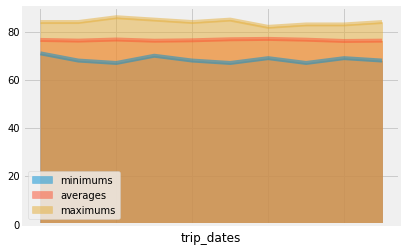

In [104]:
# Plot the daily normals as an area plot with `stacked=False`
ax = results_df.plot.area(stacked=False)
